In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm
import joblib
from scipy.stats import chi2_contingency
%load_ext watermark
%autosave 60

Autosaving every 60 seconds


In [2]:
%watermark

Last updated: 2022-11-25T16:01:25.335900+05:30

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [3]:
# Importing the library
import psutil
 
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

RAM memory % used: 61.0
RAM Used (GB): 10.27581952


In [4]:
#!jupyter notebook --NotebookApp.max_buffer_size = 12000000000
#!jupyter notebook --NotebookApp.iopub_data_rate_limit = 10000000000

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Data

### Importing Raw Data

In [61]:
# Importing the csv file
data = pd.read_csv('ITSM_data.csv')

## Source Code

### Exploratory Data Analysis

In [62]:
for dtype in ['float','int','object']:
    selected_dtype = data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.30 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 2.64 MB


In [8]:
int_types = ["uint8", "int8", "int16"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [9]:
data.shape

(46606, 25)

In [10]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [11]:
data.head(3)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN


In [12]:
# Looking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [13]:
data.describe(include='all')

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606.0,45226.000000,46606.000000,...,2284,44826,46606,46605,46146,46492.000000,46606,1222.000000,560.000000,560
unique,3019,12,64,274,46606,2,6,11.0,NaN,NaN,...,2244,33627,34528,30638,14,NaN,43060,NaN,NaN,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4.0,NaN,NaN,...,29-10-2013 15:03,10/10/2013 12:53,2/10/2013 15:20,0,Other,NaN,#MULTIVALUE,NaN,NaN,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526.0,NaN,NaN,...,2,7,21,236,16470,NaN,3434,NaN,NaN,110
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.215805,0.499658,...,NaN,NaN,NaN,NaN,NaN,1.149897,NaN,1.669394,1.058929,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705624,0.288634,...,NaN,NaN,NaN,NaN,NaN,2.556338,NaN,3.339687,0.403596,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000023,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.248213,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,0.500269,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.749094,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN


In [14]:
data.isnull().sum().sort_values(ascending=False)

Related_Change                46046
No_of_Related_Changes         46046
No_of_Related_Incidents       45384
Reopen_Time                   44322
Resolved_Time                  1780
Priority                       1380
Closure_Code                    460
No_of_Related_Interactions      114
CI_Subcat                       111
CI_Cat                          111
Handle_Time_hrs                   1
No_of_Reassignments               1
Related_Interaction               0
Close_Time                        0
CI_Name                           0
Open_Time                         0
KB_number                         0
Category                          0
number_cnt                        0
Urgency                           0
Impact                            0
Status                            0
Incident_ID                       0
WBS                               0
Alert_Status                      0
dtype: int64

In [15]:
#check columns contain nulls with their null percentage
null_percentage = pd.DataFrame()
for col in data.columns:
    if data[col].isnull().sum() > 0:
        null_percentage.loc[col,'NullPercentage'] = (data[col].isnull().sum())/len(data) * 100 
print(null_percentage)
        

                            NullPercentage
CI_Cat                            0.238167
CI_Subcat                         0.238167
Priority                          2.960992
No_of_Reassignments               0.002146
Reopen_Time                      95.099343
Resolved_Time                     3.819251
Handle_Time_hrs                   0.002146
Closure_Code                      0.986997
No_of_Related_Interactions        0.244604
No_of_Related_Incidents          97.378020
No_of_Related_Changes            98.798438
Related_Change                   98.798438


### Data Processing / Data Munging
CI Category & CI Subcategory had a lot of labels which were replaced  to only take the major ones. Unknown values were replaced by Mode values.

In [16]:
data['CI_Cat'].nunique()

12

In [17]:
data['CI_Cat'].unique()

array(['subapplication', 'application', 'computer', nan, 'displaydevice',
       'software', 'storage', 'database', 'hardware', 'officeelectronics',
       'networkcomponents', 'applicationcomponent', 'Phone'], dtype=object)

In [18]:
data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace(np.nan,'application',inplace=True)

In [19]:
data['CI_Cat'].unique()

array(['subapplication', 'application', 'computer', 'hardware',
       'software', 'storage'], dtype=object)

In [20]:
data['CI_Subcat'].nunique()

64

In [21]:
data['CI_Subcat'].unique()

array(['Web Based Application', 'Desktop Application',
       'Server Based Application', 'SAP', 'Client Based Application',
       'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
       'Linux Server', nan, 'Monitor', 'Automation Software', 'SAN',
       'Banking Device', 'Desktop', 'Database', 'Oracle Server',
       'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
       'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
       'DataCenterEquipment', 'KVM Switches', 'Switch',
       'Database Software', 'Network Component', 'Unix Server', 'Lines',
       'ESX Cluster', 'zOS Server', 'SharePoint Farm', 'NonStop Server',
       'Application Server', 'Security Software', 'Thin Client',
       'zOS Cluster', 'Router', 'VMWare', 'Net Device', 'Neoview Server',
       'MQ Queue Manager', 'UPS', 'Number', 'Iptelephony',
       'Windows Server in extern beheer', 'Modem', 'X86 Server',
       'ESX Server', 'Virtual Tape Server', 'IPtelephony',
     

In [22]:
data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [23]:
data['CI_Subcat'].unique()

array(['Web Based Application', 'Desktop Application',
       'Server Based Application', 'System Software',
       'Client Based Application', 'Laptop', 'Monitor', 'SAN',
       'Banking Device', 'Database', 'Keyboard', 'Printer', 'Exchange',
       'Scanner', 'Controller', 'Switch', 'Network Component'],
      dtype=object)

In [24]:
data['Related_Change'].unique()

array([nan, 'C00000056', '#MULTIVALUE', 'C00000308', 'C00000582',
       'C00006478', 'C00000778', 'C00002486', 'C00000577', 'C00001219',
       'C00004614', 'C00000510', 'C00002078', 'C00001452', 'C00000589',
       'C00004490', 'C00002426', 'C00000517', 'C00000449', 'C00001728',
       'C00001549', 'C00001953', 'C00002007', 'C00002268', 'C00001250',
       'C00003624', 'C00001667', 'C00002178', 'C00001730', 'C00000527',
       'C00002657', 'C00001026', 'C00014458', 'C00001135', 'C00004384',
       'C00003123', 'C00000713', 'C00003040', 'C00002301', 'C00000596',
       'C00004344', 'C00001062', 'C00006745', 'C00003468', 'C00003404',
       'C00002804', 'C00005369', 'C00003547', 'C00001137', 'C00004090',
       'C00002337', 'C00001455', 'C00007202', 'C00000874', 'C00001215',
       'C00005866', 'C00004950', 'C00002375', 'C00001807', 'C00002389',
       'C00004493', 'C00001507', 'C00004739', 'C00004854', 'C00004994',
       'C00005110', 'C00003013', 'C00005050', 'C00001831', 'C00005461'

In [25]:
data['No_of_Related_Changes'].nunique()

4

In [26]:
data['No_of_Related_Changes'].unique()

array([nan,  1.,  2.,  3.,  9.])

In [27]:
data['No_of_Related_Incidents'].nunique()

24

In [28]:
data['No_of_Related_Incidents'].unique()

array([ 2.,  1., nan, 23.,  4.,  3.,  7., 11., 12., 54., 24., 16.,  8.,
        6., 25., 14., 10.,  9.,  5., 17., 26., 21., 63., 13., 15.])

In [29]:
data['Closure_Code'].nunique()

14

In [30]:
data['Closure_Code'].unique()

array(['Other', 'Software', 'No error - works as designed',
       'Operator error', 'Unknown', 'Data', 'Referred', 'Hardware',
       'Questions', 'User error', 'Inquiry', 'User manual not used',
       'Kwaliteit van de output', nan, 'Overig'], dtype=object)

In [31]:
#Replace missing data 
data.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
data.Priority.replace(np.nan,4,inplace=True)
data.No_of_Related_Incidents.replace(np.nan,0,inplace=True)
data.No_of_Related_Changes.replace(np.nan,0,inplace=True)

### Correlation between variables

In [32]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
Priority,1.000000,-0.000574,0.088218,-0.023669,-0.066388,-0.042210
number_cnt,-0.000574,1.000000,-0.001682,0.000870,-0.005478,0.002851
No_of_Reassignments,0.088218,-0.001682,1.000000,0.036764,0.026646,0.008097
No_of_Related_Interactions,-0.023669,0.000870,0.036764,1.000000,0.103612,0.023352
No_of_Related_Incidents,-0.066388,-0.005478,0.026646,0.103612,1.000000,0.038329
No_of_Related_Changes,-0.042210,0.002851,0.008097,0.023352,0.038329,1.000000


In [33]:
df_cat = pd.DataFrame(data = data.dtypes, columns = 
                                         ['a']).reset_index()

In [34]:
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

['CI_Name',
 'CI_Cat',
 'CI_Subcat',
 'WBS',
 'Incident_ID',
 'Status',
 'Impact',
 'Urgency',
 'Category',
 'KB_number',
 'Alert_Status',
 'Open_Time',
 'Reopen_Time',
 'Resolved_Time',
 'Close_Time',
 'Handle_Time_hrs',
 'Closure_Code',
 'Related_Interaction',
 'Related_Change']

In [35]:
#data['Open_Time'] =  pd.to_datetime(data['Open_Time'])
#data['Reopen_Time'] =  pd.to_datetime(data['Reopen_Time'])
#data['Resolved_Time'] =  pd.to_datetime(data['Resolved_Time'])
#data['Close_Time'] =  pd.to_datetime(data['Close_Time'])

#data["Handle_Time_hrs"] = pd.to_numeric(data["Handle_Time_hrs"])

In [36]:
df_cat = pd.DataFrame(data = data.dtypes, columns = 
                                         ['a']).reset_index()

In [37]:
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
cat_var

['CI_Name',
 'CI_Cat',
 'CI_Subcat',
 'WBS',
 'Incident_ID',
 'Status',
 'Impact',
 'Urgency',
 'Category',
 'KB_number',
 'Alert_Status',
 'Handle_Time_hrs',
 'Closure_Code',
 'Related_Interaction',
 'Related_Change']

In [38]:
df_cat = data[cat_var]
df_cat.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,incident,KM0000553,closed,"3,87,16,91,111",Other,SD0000007,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,incident,KM0000611,closed,"4,35,47,86,389",Software,SD0000011,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,request for information,KM0000339,closed,"4,84,31,19,444",No error - works as designed,SD0000017,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,incident,KM0000611,closed,"4,32,18,33,333",Operator error,SD0000025,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,incident,KM0000611,closed,"3,38,39,03,333",Other,SD0000029,NaN


In [39]:
df_cat["Related_Change"].unique()

array([nan, 'C00000056', '#MULTIVALUE', 'C00000308', 'C00000582',
       'C00006478', 'C00000778', 'C00002486', 'C00000577', 'C00001219',
       'C00004614', 'C00000510', 'C00002078', 'C00001452', 'C00000589',
       'C00004490', 'C00002426', 'C00000517', 'C00000449', 'C00001728',
       'C00001549', 'C00001953', 'C00002007', 'C00002268', 'C00001250',
       'C00003624', 'C00001667', 'C00002178', 'C00001730', 'C00000527',
       'C00002657', 'C00001026', 'C00014458', 'C00001135', 'C00004384',
       'C00003123', 'C00000713', 'C00003040', 'C00002301', 'C00000596',
       'C00004344', 'C00001062', 'C00006745', 'C00003468', 'C00003404',
       'C00002804', 'C00005369', 'C00003547', 'C00001137', 'C00004090',
       'C00002337', 'C00001455', 'C00007202', 'C00000874', 'C00001215',
       'C00005866', 'C00004950', 'C00002375', 'C00001807', 'C00002389',
       'C00004493', 'C00001507', 'C00004739', 'C00004854', 'C00004994',
       'C00005110', 'C00003013', 'C00005050', 'C00001831', 'C00005461'

In [40]:
df_cat.isnull().sum().sort_values(ascending=False)

Related_Change         46046
Closure_Code             460
Handle_Time_hrs            1
CI_Name                    0
CI_Cat                     0
CI_Subcat                  0
WBS                        0
Incident_ID                0
Status                     0
Impact                     0
Urgency                    0
Category                   0
KB_number                  0
Alert_Status               0
Related_Interaction        0
dtype: int64

In [41]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [42]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [43]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [44]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# ITSM_data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('ITSM_data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'ITSM_data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 25 columns


In [45]:
#plotPerColumnDistribution(df1, 10, 5)


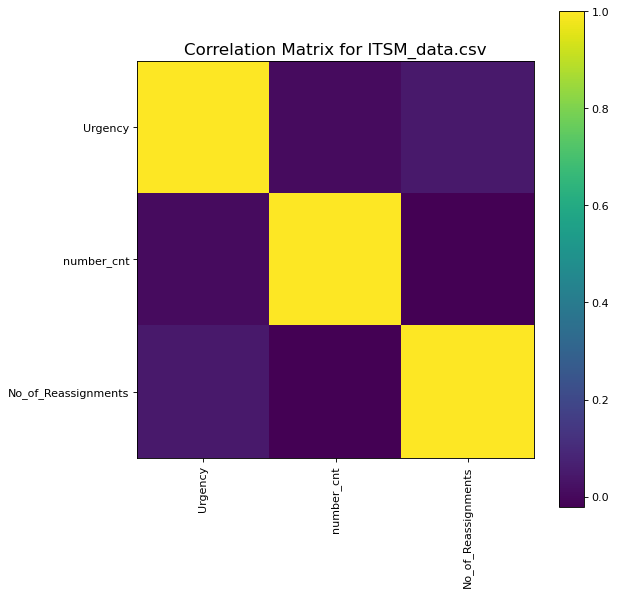

In [46]:
plotCorrelationMatrix(df1, 8)


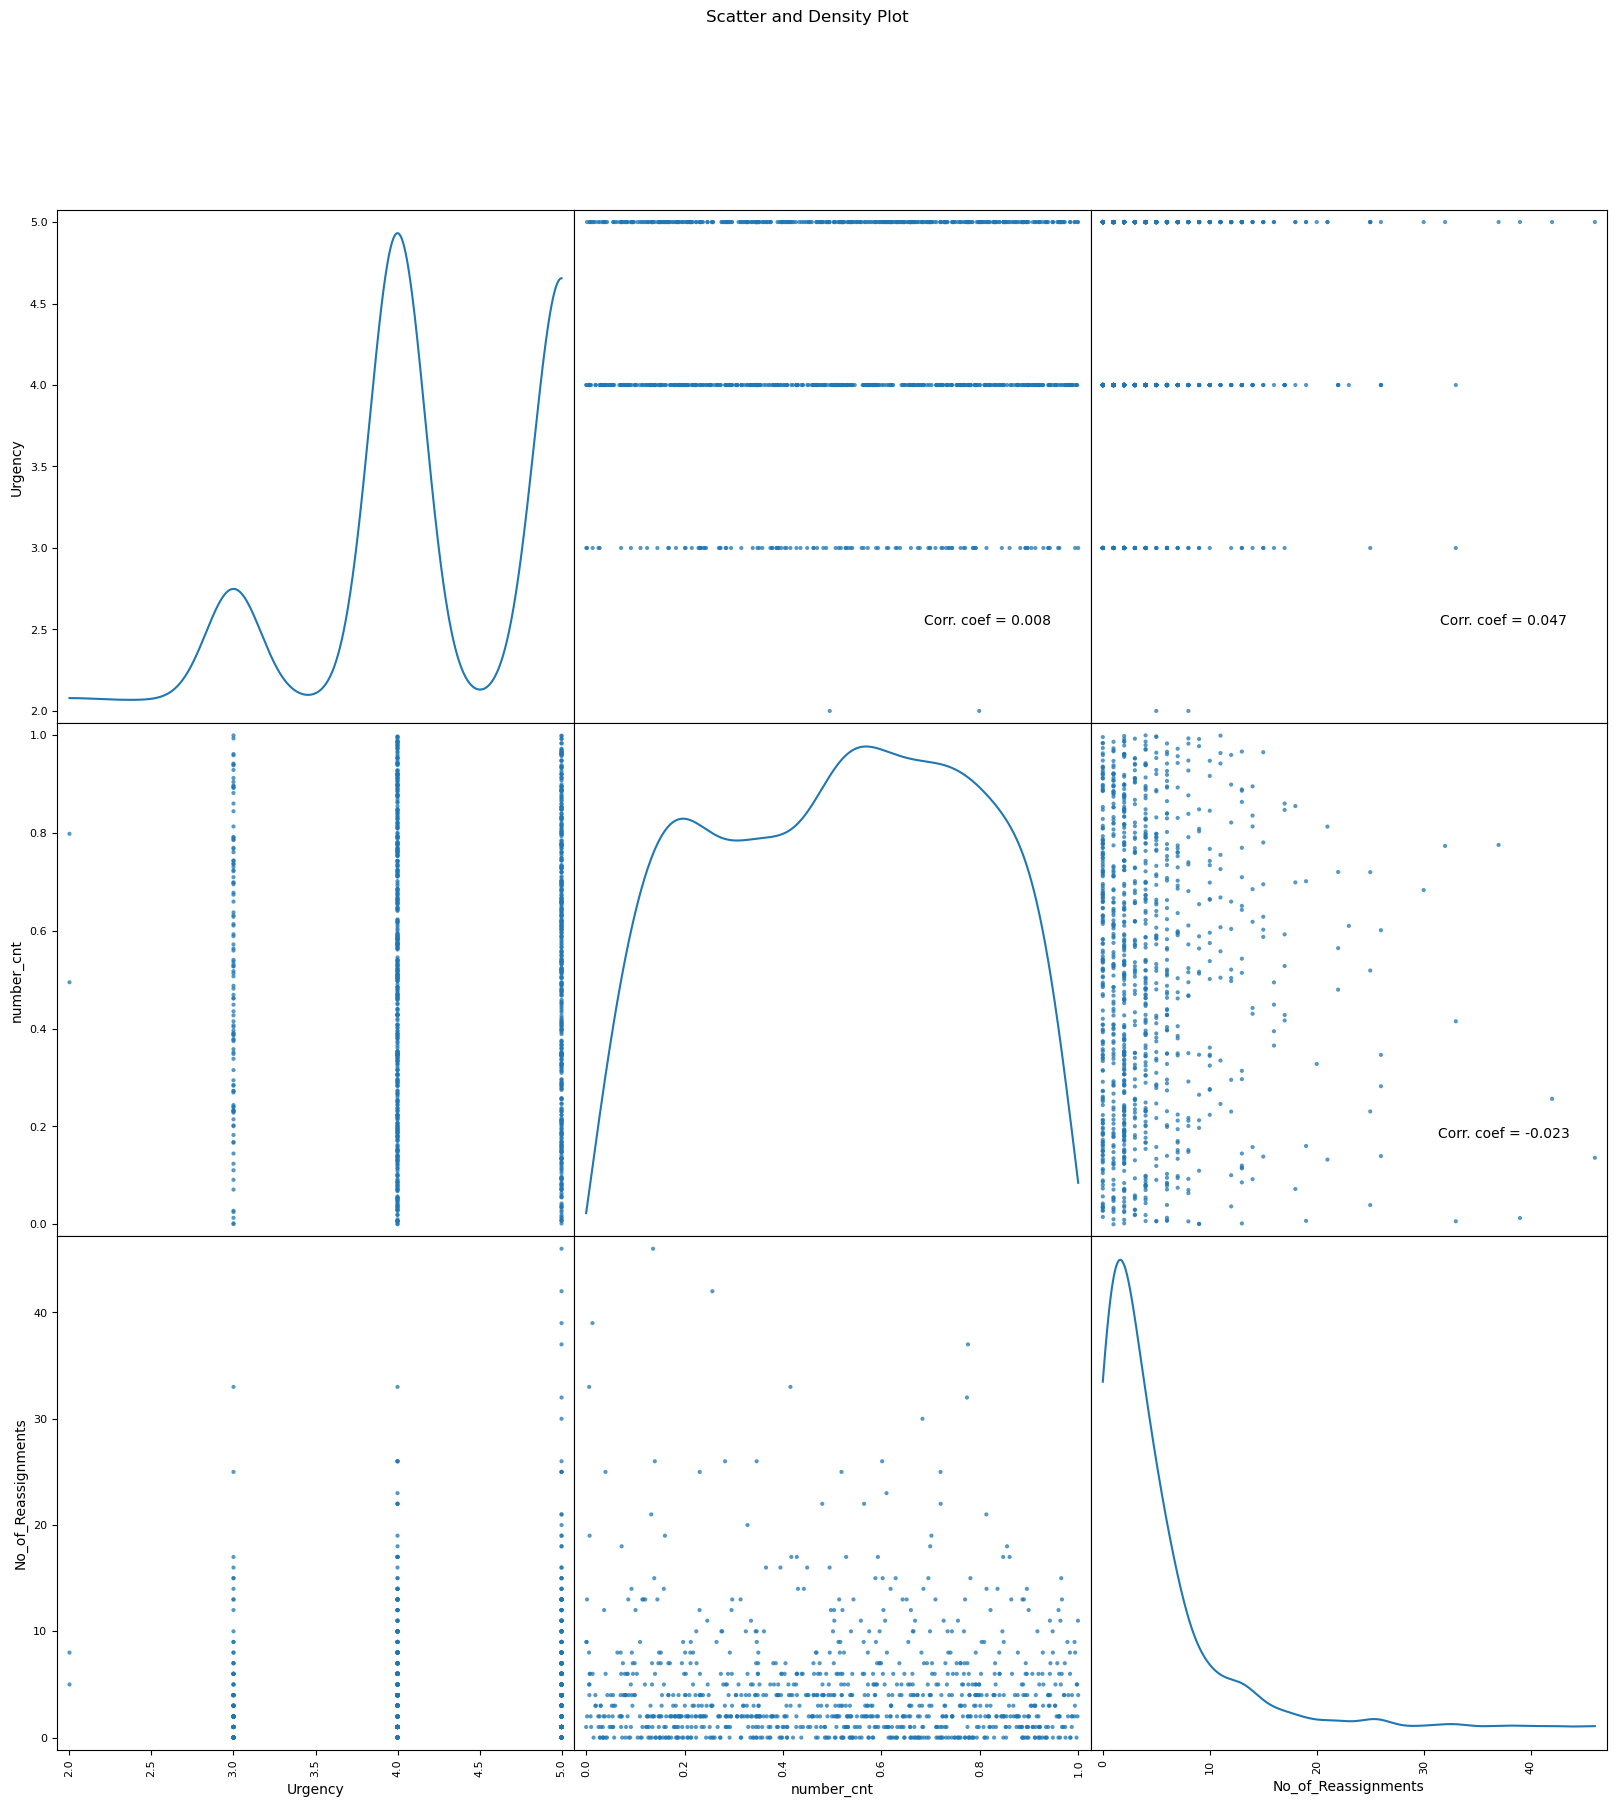

In [47]:
plotScatterMatrix(df1, 20, 10)


In [48]:
# Create correlation matrix
corr_mat = data.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending=False)
  
print(sorted_mat)

Priority                    Priority                      1.000000
number_cnt                  number_cnt                    1.000000
No_of_Related_Incidents     No_of_Related_Incidents       1.000000
No_of_Related_Interactions  No_of_Related_Interactions    1.000000
No_of_Reassignments         No_of_Reassignments           1.000000
No_of_Related_Changes       No_of_Related_Changes         1.000000
No_of_Related_Interactions  No_of_Related_Incidents       0.103612
No_of_Related_Incidents     No_of_Related_Interactions    0.103612
Priority                    No_of_Reassignments           0.088218
No_of_Reassignments         Priority                      0.088218
No_of_Related_Incidents     No_of_Related_Changes         0.038329
No_of_Related_Changes       No_of_Related_Incidents       0.038329
No_of_Related_Interactions  No_of_Reassignments           0.036764
No_of_Reassignments         No_of_Related_Interactions    0.036764
No_of_Related_Incidents     No_of_Reassignments           0.02

In [49]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [50]:
df_cat.columns


Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Category', 'KB_number', 'Alert_Status',
       'Handle_Time_hrs', 'Closure_Code', 'Related_Interaction',
       'Related_Change'],
      dtype='object')

In [51]:
cramers_v(data["CI_Cat"], data["CI_Subcat"])

0.7345307510165584

In [84]:
cramers_v(data["Priority"], data["CI_Subcat"])

0.32405986823305594

In [77]:
cramers_v(data["No_of_Related_Interactions"], data["No_of_Related_Incidents"])

0.424370154213994

In [53]:
cramers_v(data["CI_Name"], data["CI_Cat"])

0.967131504832453

In [54]:
cramers_v(data["CI_Name"], data["CI_Subcat"])

0.9672456714669989

In [81]:
cramers_v(data["WBS"], data["Priority"])

0.5343334616107062

In [83]:
cramers_v(data["WBS"], data["Category"])

0.648306942985088

In [80]:
cramers_v(data["CI_Subcat"], data["Category"])

0.23243609856963196

In [79]:
cramers_v(data["WBS"], data["Priority"])

0.5343334616107062

In [56]:
cramers_v(data["WBS"], data["CI_Name"])

0.951328787797089

In [57]:
cramers_v(data["KB_number"], data["Category"])

0.7810607935661948

In [58]:
cramers_v(data["Closure_Code"], data["Category"])

0.6145474041865873

In [59]:
cramers_v(data["Impact"], data["Urgency"])

0.8334293810815688

In [52]:
data.dtypes

CI_Name                               object
CI_Cat                                object
CI_Subcat                             object
WBS                                   object
Incident_ID                           object
Status                                object
Impact                                object
Urgency                               object
Priority                             float64
number_cnt                           float64
Category                              object
KB_number                             object
Alert_Status                          object
No_of_Reassignments                  float64
Open_Time                     datetime64[ns]
Reopen_Time                   datetime64[ns]
Resolved_Time                 datetime64[ns]
Close_Time                    datetime64[ns]
Handle_Time_hrs                       object
Closure_Code                          object
No_of_Related_Interactions           float64
Related_Interaction                   object
No_of_Rela

In [53]:
#df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [54]:
# Function to return the constant value columns of a given DataFrame
def remove_constant_value_features(data):
    return [e for e in data.columns if data[e].nunique() == 1]

drop_col = remove_constant_value_features(data)
drop_col

['Alert_Status']

In [55]:
data=data.drop(['Alert_Status'],axis=1)

In [ ]:
rows= []

for var1 in df_cat:
    print(var1)
    col = []
    for var2 in df_cat :
        cramers =cramers_v(df_cat[var1], df_cat[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_cat.columns)



df


## 1. Predicting Priorities

### Feature Selection
Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.

In [33]:
X = data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = data.Priority

In [34]:
X.head(2)

,CI_Cat,CI_Subcat,WBS,Category
0,subapplication,Web Based Application,WBS000162,incident
1,application,Web Based Application,WBS000088,incident


In [65]:
cramers_v(data["CI_Subcat"], data["CI_Cat"])

0.7345307510165585

In [66]:
cramers_v(data["CI_Subcat"], data["WBS"])

0.70231634462217

In [67]:
cramers_v(data["CI_Subcat"], data["Category"])

0.23243609856963196

In [69]:
print(data["CI_Cat"].nunique(), data["CI_Subcat"].nunique(), data["WBS"].nunique(), data["Category"].nunique())

6 17 274 4


In [35]:
import category_encoders as ce

In [36]:
%%time
# Label Encoding except WBS
enc= LabelEncoder()
for i in (0,1,3):
    X.iloc[:,i] = enc.fit_transform(X.iloc[:,i])

Wall time: 23.5 ms


In [37]:
%%time
loue = ce.LeaveOneOutEncoder(cols=['WBS'])
X['WBS'] = loue.fit_transform(X['WBS'],y)


Wall time: 42.2 ms


In [62]:
X.head(5)

,CI_Cat,CI_Subcat,WBS,Category
0,5,16,3.921053,1
1,0,16,3.919094,1
2,0,4,3.918263,3
3,0,16,3.917476,1
4,0,16,3.917476,1


In [63]:
y.head(5)

0    4.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: Priority, dtype: float64

In [39]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
# Standardization technique
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [40]:
X_train.shape

(32624, 4)

In [41]:
X_test.shape

(13982, 4)

## Models

### 1. Support Vector Machine

In [42]:
%%time
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train,y_train)

Wall time: 34.3 s


In [43]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [44]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8033900729509369
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.51      0.66      0.57       210
         3.0       0.67      0.52      0.59      1581
         4.0       0.78      0.89      0.84      7254
         5.0       0.90      0.76      0.83      4936

    accuracy                           0.80     13982
   macro avg       0.57      0.57      0.57     13982
weighted avg       0.81      0.80      0.80     13982



In [45]:
confusion_matrix(y_test,y_predict_svm)

array([[   0,    0,    0,    1,    0],
       [   0,  138,    9,   57,    6],
       [   0,   45,  829,  596,  111],
       [   0,   77,  380, 6492,  305],
       [   0,   10,   23, 1129, 3774]], dtype=int64)

### 2. Decision Tree

In [46]:
%%time
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

Wall time: 96.1 ms


DecisionTreeClassifier()

In [47]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [48]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9923473036761551
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.94      0.94      0.94       210
         3.0       0.98      0.98      0.98      1581
         4.0       1.00      1.00      1.00      7254
         5.0       1.00      0.99      0.99      4936

    accuracy                           0.99     13982
   macro avg       0.78      0.78      0.78     13982
weighted avg       0.99      0.99      0.99     13982



In [49]:
confusion_matrix(y_test,y_predict_dtree)

array([[   0,    0,    0,    1,    0],
       [   0,  198,    3,    6,    3],
       [   0,    3, 1554,   15,    9],
       [   0,    2,   21, 7221,   10],
       [   3,    8,   11,   12, 4902]], dtype=int64)

### 3. Random Forest

In [50]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=27)

In [51]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)

In [52]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9916320984122443
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.96      0.94      0.95       210
         3.0       0.98      0.98      0.98      1581
         4.0       0.99      0.99      0.99      7254
         5.0       0.99      0.99      0.99      4936

    accuracy                           0.99     13982
   macro avg       0.78      0.78      0.78     13982
weighted avg       0.99      0.99      0.99     13982



In [53]:
confusion_matrix(y_test,y_predict_rf)

array([[   0,    1,    0,    0,    0],
       [   0,  198,    2,    6,    4],
       [   0,    2, 1543,   22,   14],
       [   0,    1,   20, 7217,   16],
       [   0,    5,    9,   15, 4907]], dtype=int64)

### 4. K-Nearest Neighbor

In [54]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [55]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [56]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.9718924331283079
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.93      0.76      0.83       210
         3.0       0.92      0.94      0.93      1581
         4.0       0.98      0.98      0.98      7254
         5.0       0.98      0.98      0.98      4936

    accuracy                           0.97     13982
   macro avg       0.76      0.73      0.74     13982
weighted avg       0.97      0.97      0.97     13982



In [57]:
confusion_matrix(y_test,y_predict_knn)

array([[   0,    1,    0,    0,    0],
       [   0,  159,   34,   16,    1],
       [   0,    9, 1480,   66,   26],
       [   0,    0,   72, 7119,   63],
       [   0,    2,   26,   77, 4831]], dtype=int64)

### 5. XGBoost Classifier

In [64]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [68]:
y_test = le.fit_transform(y_test)

In [65]:
%%time
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

Wall time: 1.57 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [69]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [70]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9896295236732943
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      0.89      0.93       210
           2       0.98      0.97      0.98      1581
           3       0.99      1.00      0.99      7254
           4       0.99      0.99      0.99      4936

    accuracy                           0.99     13982
   macro avg       0.79      0.77      0.78     13982
weighted avg       0.99      0.99      0.99     13982



In [71]:
confusion_matrix(y_test,y_predict_xgb)

array([[   0,    0,    0,    1,    0],
       [   0,  187,    4,   13,    6],
       [   0,    1, 1536,   28,   16],
       [   0,    0,   14, 7219,   21],
       [   0,    3,    8,   30, 4895]], dtype=int64)

### 6. Artificial Neural Network

In [72]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp.fit(X_train,y_train)

MLPClassifier()

In [73]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [74]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.801530539264769
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.53      0.65      0.59       210
           2       0.66      0.52      0.58      1581
           3       0.79      0.88      0.84      7254
           4       0.87      0.78      0.82      4936

    accuracy                           0.80     13982
   macro avg       0.57      0.57      0.57     13982
weighted avg       0.80      0.80      0.80     13982



In [75]:
confusion_matrix(y_test,y_predict_mlp)

array([[   0,    0,    0,    1,    0],
       [   0,  137,   13,   53,    7],
       [   0,   36,  825,  554,  166],
       [   0,   75,  371, 6417,  391],
       [   0,   10,   32, 1066, 3828]], dtype=int64)

In [76]:
# Exporting the trained model
joblib.dump(model_rf,'Predicting_Priority.ml')

['Predicting_Priority.ml']

## 2. Predicting Request For Change (RFC)

### Feature Selection

In [222]:
# Selecting the predictors
X1 = data.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data.No_of_Related_Changes

In [223]:
X1.head(2)

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,Web Based Application,WBS000162,4.0,incident,1.0,2.0
1,Web Based Application,WBS000088,3.0,incident,1.0,1.0


In [224]:
print(X1["CI_Subcat"].nunique()),print(X1["Priority"].nunique()),print(X1["Category"].nunique()),print(X1["No_of_Related_Interactions"].nunique()),print(X1["No_of_Related_Incidents"].nunique())

17
5
4
49
25


(None, None, None, None, None)

In [225]:
X1["CI_Subcat"].value_counts(dropna=False)

Server Based Application    19208
Web Based Application       15422
Desktop Application          4299
System Software              2363
Laptop                       1921
Banking Device                917
Client Based Application      579
Database                      570
SAN                           549
Monitor                       212
Controller                    146
Exchange                      130
Printer                        88
Scanner                        64
Switch                         60
Network Component              51
Keyboard                       27
Name: CI_Subcat, dtype: int64

In [226]:
X1['No_of_Related_Interactions'] = X1['No_of_Related_Interactions'].apply(np.int64)
X1['No_of_Related_Incidents'] = X1['No_of_Related_Incidents'].apply(np.int64)

In [227]:
relinc_freq = X1["No_of_Related_Incidents"].value_counts()
botton_decile = relinc_freq.quantile(q=0.1)
less_freq_relinc = relinc_freq[city_freq<=botton_decile]
X1.loc[X1["No_of_Related_Incidents"].isin(less_freq_relinc.index.tolist()), "No_of_Related_Incidents"] = 100

In [228]:
X1["No_of_Related_Incidents"].value_counts()

0      45384
1       1057
2         74
3         20
4         13
100        9
5          8
6          8
9          6
8          5
12         4
11         4
7          4
16         3
17         3
24         2
10         2
Name: No_of_Related_Incidents, dtype: int64

In [229]:
#Reduce cardinality for No_of_Related_Interactions
relint_freq = (X1["No_of_Related_Interactions"].value_counts())
botton_decile = relint_freq.quantile(q=0.1)
less_freq_relint = relint_freq[relint_freq<=botton_decile]
X1.loc[X1["No_of_Related_Interactions"].isin(less_freq_relint.index.tolist()), "No_of_Related_Interactions"] = 100


In [219]:
X1["No_of_Related_Interactions"].value_counts()

1        43172
2         2736
3          429
4          124
5           30
other       18
6           16
7           12
12           6
8            6
20           5
9            5
13           4
22           3
42           3
19           3
10           3
15           3
16           2
23           2
45           2
33           2
17           2
34           2
44           2
18           2
29           2
28           2
14           2
11           2
39           2
26           2
Name: No_of_Related_Interactions, dtype: int64

In [188]:
X1["CI_Subcat"].value_counts()

Server Based Application    19208
Web Based Application       15422
Desktop Application          4299
System Software              2363
Laptop                       1921
Banking Device                917
Client Based Application      579
Database                      570
SAN                           549
Monitor                       212
Controller                    146
Exchange                      130
Printer                        88
Scanner                        64
Switch                         60
Network Component              51
Keyboard                       27
Name: CI_Subcat, dtype: int64

In [230]:
print(X1["CI_Subcat"].nunique()),print(X1["Priority"].nunique()),print(X1["Category"].nunique()),print(X1["No_of_Related_Interactions"].nunique()),print(X1["No_of_Related_Incidents"].nunique())

17
5
4
32
17


(None, None, None, None, None)

In [ ]:
#if values are strings
#List_not_change = ['1','2','3']

#df.loc[~df['Column a'].isin(List_not_change), 'Column a'] = 'other'

In [203]:
X1.columns

Index(['CI_Subcat', 'WBS', 'Priority', 'Category',
       'No_of_Related_Interactions', 'No_of_Related_Incidents'],
      dtype='object')

In [205]:
X1.head(5)

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,16,WBS000162,3,1,1.0,2.0
1,16,WBS000088,2,1,1.0,1.0
2,4,WBS000092,3,3,1.0,0.0
3,16,WBS000088,3,1,1.0,0.0
4,16,WBS000088,3,1,1.0,0.0


In [232]:
enc= LabelEncoder()
for i in (0,2,3,4,5):
    X1.iloc[:,i] = enc.fit_transform(X1.iloc[:,i])

In [238]:
%%time
loue = ce.LeaveOneOutEncoder(cols=['WBS'])
X1['WBS'] = loue.fit_transform(X1['WBS'],y)


Wall time: 54.4 ms


In [240]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=10)

In [241]:
# Standardization technique is used
#sc = StandardScaler()
#X1_train = sc.fit_transform(X1_train)
#X1_test = sc.transform(X1_test)

In [242]:
X1_train.shape

(37284, 6)

In [243]:
X1_test.shape

(9322, 6)

## Models

### 1. Decision Tree

In [244]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [245]:
# Predicting the model
y1_predict_dtree = model1_dtree.predict(X1_test)

In [246]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))

0.9883072302081098
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9226
         1.0       0.07      0.01      0.02        92
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.99      9322
   macro avg       0.26      0.25      0.25      9322
weighted avg       0.98      0.99      0.98      9322



In [247]:
confusion_matrix(y1_test,y1_predict_dtree)

array([[9212,   14,    0,    0],
       [  91,    1,    0,    0],
       [   3,    0,    0,    0],
       [   1,    0,    0,    0]], dtype=int64)

### 2. Random Forest

In [248]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [249]:
# Predicting the model
y1_predict_rf = model1_rf.predict(X1_test)

In [250]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.9889508689122506
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9226
         1.0       0.00      0.00      0.00        92
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         1

    accuracy                           0.99      9322
   macro avg       0.25      0.25      0.25      9322
weighted avg       0.98      0.99      0.98      9322



In [251]:
confusion_matrix(y1_test,y1_predict_rf)

array([[9219,    7,    0,    0],
       [  92,    0,    0,    0],
       [   3,    0,    0,    0],
       [   1,    0,    0,    0]], dtype=int64)

In [252]:
# Exporting the trained model
joblib.dump(model1_dtree,'Predict_RFC.ml')

['Predict_RFC.ml']

## 3. Forecasting the Incident Volume

In [63]:
# Imporing the necessary columns
incfrq = data.loc[:,['Incident_ID','Open_Time']]

In [64]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,5/2/2012 13:32
1,IM0000005,12/3/2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10/8/2012 11:01


### Data Processing / Data Munging

In [65]:
# Coverting all the values in proper Datetime format
for i in range(len(incfrq.Open_Time)):
    if (incfrq.Open_Time[i][1]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (incfrq.Open_Time[i][2]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [66]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [67]:
# Adding a new column which will have the number of tickets per day
incfrq['No_Incidents'] = incfrq.groupby('Open_Time')['Incident_ID'].transform('count')

In [68]:
incfrq.drop(['Incident_ID'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)

In [69]:
incfrq.head(3)

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1


In [70]:
# Setting Date as the Index
incfrq = incfrq.set_index('Open_Time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [71]:
incfrq.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [72]:
# Checking range of dates for our values
print(incfrq.index.min(),'to',incfrq.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [73]:
# Making a new Series with frequency as Day
data1 = incfrq['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [74]:
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

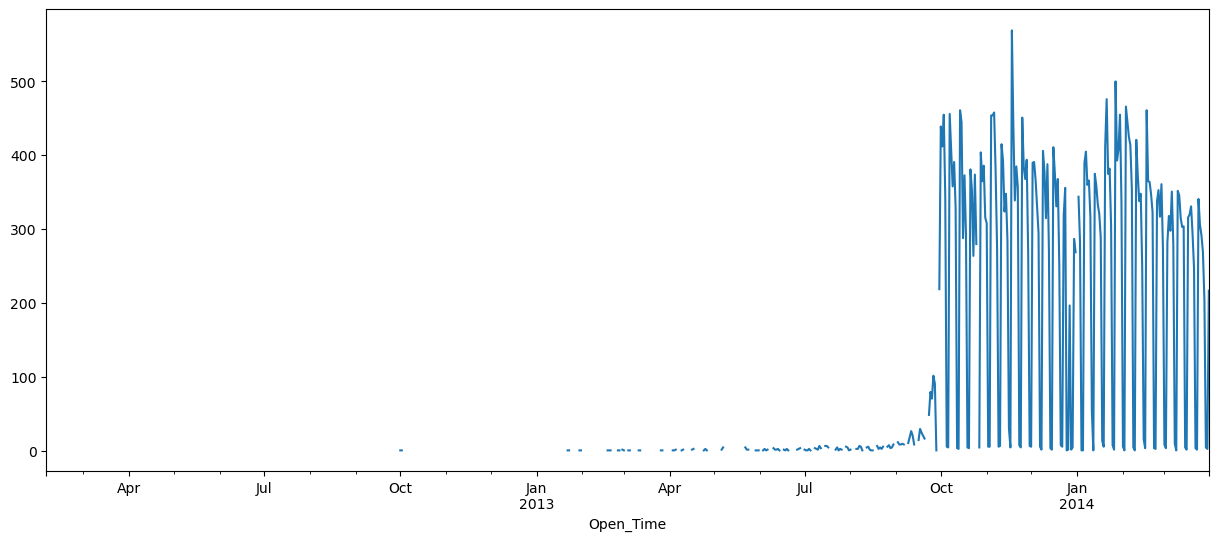

In [75]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [76]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

In [77]:
incfrom2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [78]:
# new Series
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

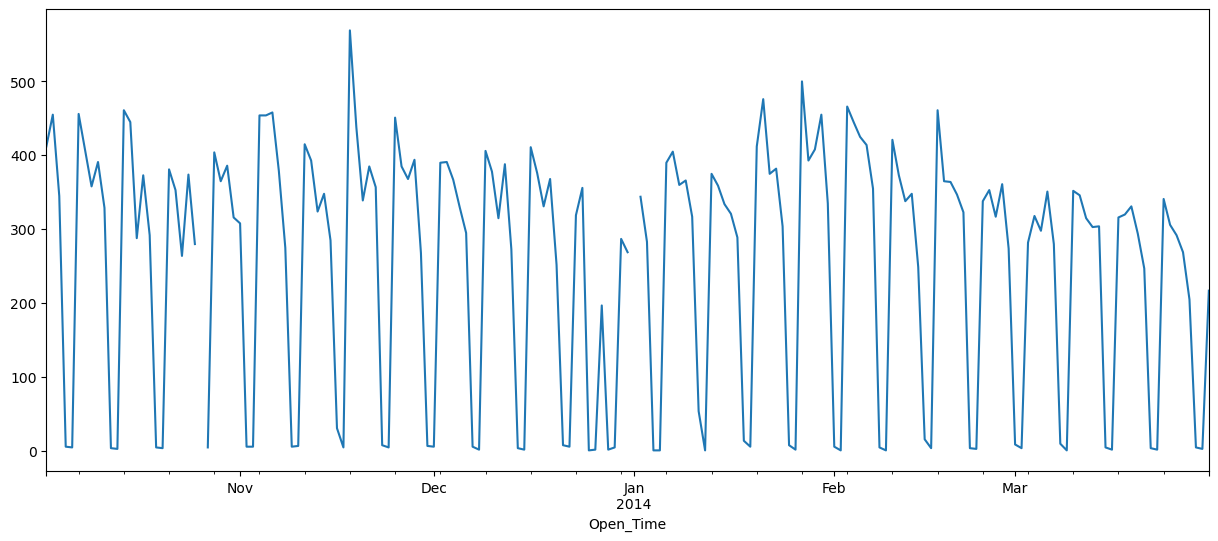

In [79]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

In [80]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [81]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.785382472209
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363347365786
ARIMA(1, 0, 0) - AIC:2365.2916469365655
ARIMA(1, 0, 1) - AIC:2337.3125086933514
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.43158124368


In [82]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.764      2.576      0.010    6023.451    4.44e+04


In [83]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

### Visualization

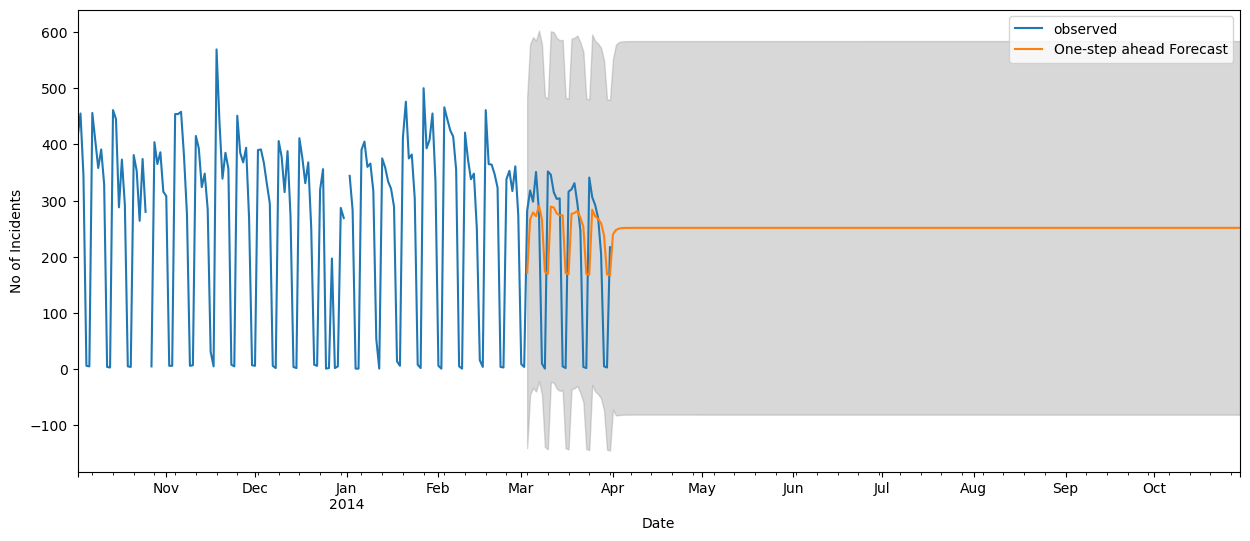

In [84]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()